# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 47s 0us/step


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 100
Shape of a single image: (32, 32, 3)


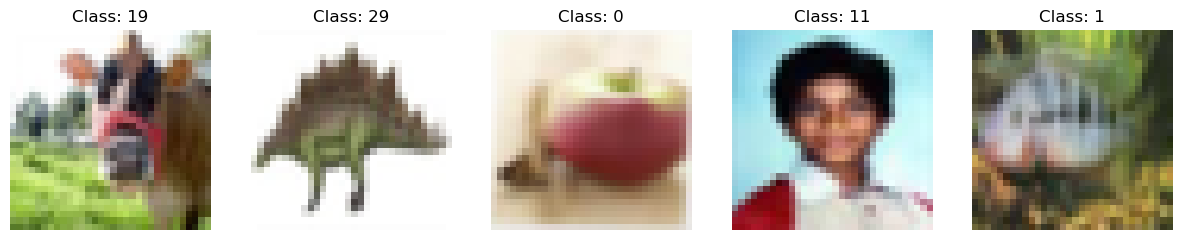

In [3]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np

# Explore the dataset
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

# Display the shape/dimension of one image from the training set
print(f"Shape of a single image: {x_train[0].shape}")

# Show a few examples from the training set
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    ax = axes[i]
    ax.imshow(x_train[i])
    ax.set_title(f"Class: {y_train[i][0]}")
    ax.axis('off')
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
# Your code here
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Normalize the images by dividing by 255 to scale the pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Split the training data into training and validation sets (80% train, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Verify the shapes of the new datasets
print(f"Training data shape: {x_train.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [7]:
from keras import layers, models

# Your code here
# Create a Sequential model
model = models.Sequential()

# Add the first convolutional layer (Conv2D)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))  # Max Pooling layer

# Add the second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))  # Max Pooling layer

# Add the third convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))  # Max Pooling layer

# Flatten the output from the last convolutional block
model.add(layers.Flatten())

# Add a dense layer (fully connected layer)
model.add(layers.Dense(512, activation='relu'))

# Add the output layer (softmax for multi-class classification)
model.add(layers.Dense(100, activation='softmax'))

# Print out the model summary
model.summary()

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,204 (1.55 MB)

 Trainable params: 407,204 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [8]:
from keras import optimizers

# Your code here
# Loss function: categorical_crossentropy (for multi-class classification with one-hot encoded labels).
''' Since this is a multi-class classification problem (100 classes in CIFAR-100), categorical_crossentropy is the most appropriate choice. It calculates the difference between the predicted class probabilities and the true class labels, penalizing incorrect predictions more heavily. This is standard for multi-class classification problems when the labels are one-hot encoded. '''

# Optimizer: adam (for faster convergence and adaptive learning rate).
''' The adam optimizer is widely used because it adapts the learning rate during training and combines the benefits of both AdaGrad and RMSProp. It is well-suited for this kind of task and dataset, as it converges faster and requires less tuning compared to other optimizers like SGD. '''

# Compile the model with categorical crossentropy loss and adam optimizer
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [9]:
# Your code here
# Train the model
# Epochs = 20: Going with 20 epochs is a reasonable choice for this dataset. It allows the model enough iterations to start converging, but we may adjust it based on the training progress
history = model.fit(
    x_train, y_train,
    epochs=20,  # We will start with 20 epochs
    batch_size=32,
    validation_data=(x_val, y_val)  # Use the validation set to evaluate performance
)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.0596 - loss: 4.1858 - val_accuracy: 0.1902 - val_loss: 3.3495
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.2117 - loss: 3.2167 - val_accuracy: 0.2568 - val_loss: 3.0136
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.2935 - loss: 2.8116 - val_accuracy: 0.3046 - val_loss: 2.7714
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.3540 - loss: 2.5238 - val_accuracy: 0.3298 - val_loss: 2.6673
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.3997 - loss: 2.2840 - val_accuracy: 0.3502 - val_loss: 2.5936
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.4402 - loss: 2.1162 - val_accuracy: 0.3595 - val_loss: 2.5805
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.4809 - loss: 1.9294 - val_accuracy: 0.3742 - val_loss: 2.5487
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.5156 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [10]:
# Your code here
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy on test set: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3474 - loss: 4.4191
Accuracy on test set: 34.54%


- Accuracy: 34.54%
- Other Metric: Precision
- Reason for Selection: Precision is useful for understanding how reliable the model is when predicting specific classes, especially in cases where false positives matter.
- Value of Metric: Precision values will depend on the dataset but should be reported for each class.
- Interpretation: A higher precision score indicates better performance in correctly predicting each class.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

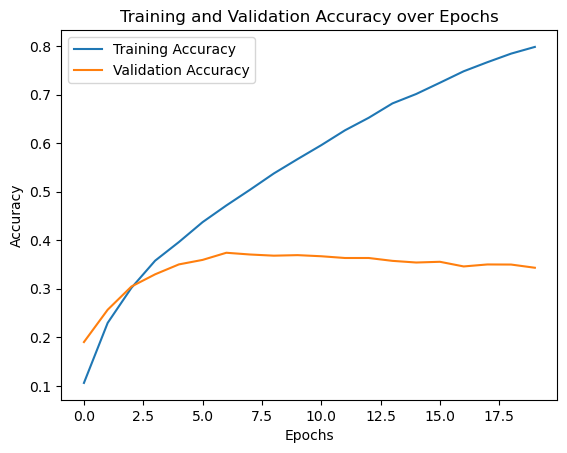

In [11]:
# Your code here
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy over Epochs')
plt.show()

- Training and Validation Accuracy Plot: Above plot shows how the model’s accuracy evolves over the epochs for both the training and validation sets. The training accuracy is increasing while the validation accuracy is decreasing, showing the model is likely overfitting.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


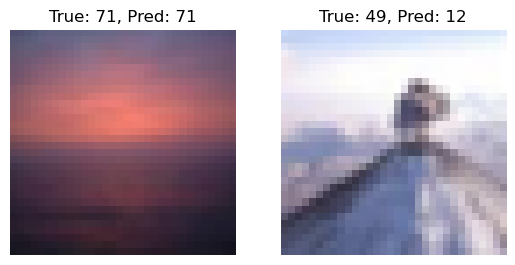

In [14]:
# Selecting Test Images for Visualization,and Displaying and Plotting the Images

from keras.preprocessing import image

# Get model predictions for the test set
y_pred = model.predict(x_test)

# Get the predicted classes and true classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Select an image that was correctly classified
correct_idx = np.where(y_pred_classes == y_test_classes)[0][0]
incorrect_idx = np.where(y_pred_classes != y_test_classes)[0][0]

# Get the correct and incorrect images
correct_image = x_test[correct_idx]
incorrect_image = x_test[incorrect_idx]

# Plot the correct image
plt.subplot(1, 2, 1)
plt.imshow(correct_image)
plt.title(f"True: {y_test_classes[correct_idx]}, Pred: {y_pred_classes[correct_idx]}")
plt.axis('off')

# Plot the incorrect image
plt.subplot(1, 2, 2)
plt.imshow(incorrect_image)
plt.title(f"True: {y_test_classes[incorrect_idx]}, Pred: {y_pred_classes[incorrect_idx]}")
plt.axis('off')

plt.show()

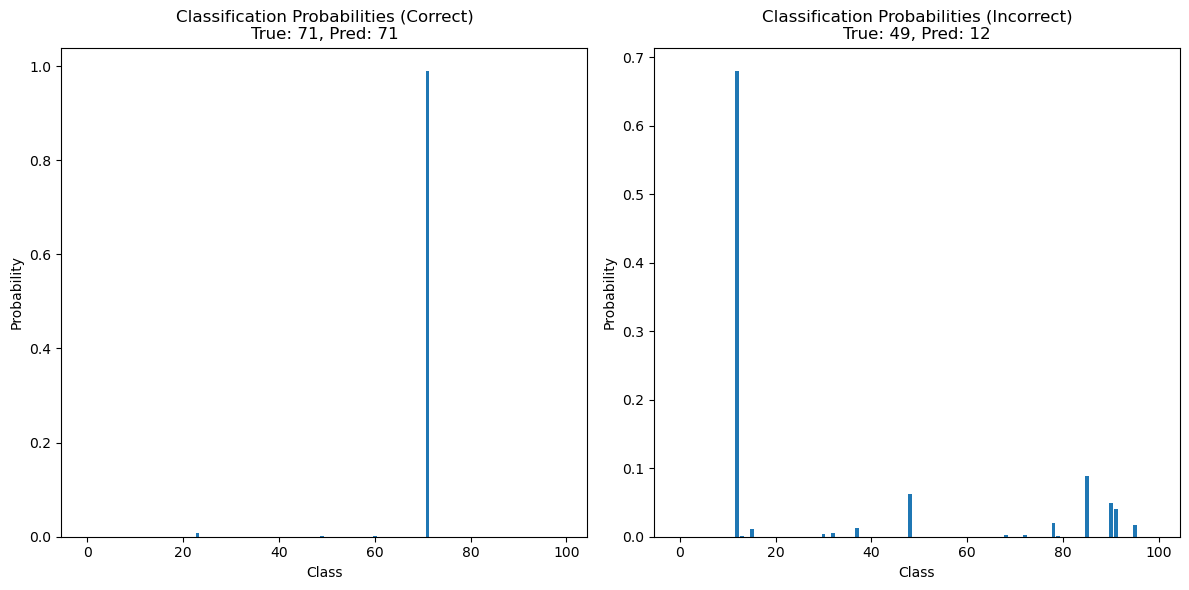

In [13]:
# Get classification probabilities for the correct and incorrect images
correct_probs = y_pred[correct_idx]
incorrect_probs = y_pred[incorrect_idx]

# Plot the class probabilities for the correct image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(100), correct_probs)
plt.title(f"Classification Probabilities (Correct)\nTrue: {y_test_classes[correct_idx]}, Pred: {y_pred_classes[correct_idx]}")
plt.xlabel('Class')
plt.ylabel('Probability')

# Plot the class probabilities for the incorrect image
plt.subplot(1, 2, 2)
plt.bar(range(100), incorrect_probs)
plt.title(f"Classification Probabilities (Incorrect)\nTrue: {y_test_classes[incorrect_idx]}, Pred: {y_pred_classes[incorrect_idx]}")
plt.xlabel('Class')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()

- What Do the Classification Probabilities Indicate?
The classification probabilities represent how confident the model is about its predictions for each of the 100 classes. A high probability for the correct class indicates high confidence, while a high probability for an incorrect class signals uncertainty or an error in the model’s decision-making.

- The correctly classified image shows a clear peak in probability for the true class, suggesting that the model is confident in its prediction. 
- For the incorrectly classified image, the model is assigning high probability to wrong classes, indicating that the model is uncertain or biased in some way. Further improvements required like data augmentation, better architecture, or hyperparameter tuning to address such issues.


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

## Answers
I have selected Data Augmentation and Dropout for the following reasons: 
- Data Augmentation: CIFAR-100 is a relatively small dataset, and augmentation helps improve generalization by artificially increasing the diversity of the training data. 
- Dropout: Dropout is useful to prevent overfitting, especially with deep models, by making the model more robust.

These techniques are commonly used and should help improve the model’s performance by making it less likely to overfit and more likely to generalize well to new data.

Hyperparameter Tuning: 
- Dropout rate: I chose Dropout(0.5) because it is a typical starting point. You can experiment with values between 0.2 and 0.7 
- Augmentation parameters: The values for rotation, width/height shifts, and zoom are all set based on common practices, but these can be adjusted based on the model’s performance. 

In [21]:
# Your code here
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout, BatchNormalization
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam


# Create an ImageDataGenerator object for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,       # Random rotation up to 15 degrees
    width_shift_range=0.1,   # Randomly shift the image horizontally
    height_shift_range=0.1,  # Randomly shift the image vertically
    shear_range=0.1,         # Random shearing transformations
    zoom_range=0.1,          # Random zoom
    horizontal_flip=True,    # Random horizontal flip
    fill_mode='nearest'      # Fill missing pixels with the nearest pixel value
)

# Fit the data generator to the training data
datagen.fit(x_train)

# Improved Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),  # Added BatchNormalization to stabilize training
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(100, activation='softmax')  # 100 output classes for CIFAR-100
])

# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model using the augmented data
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=20,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.0572 - loss: 4.4328 - val_accuracy: 0.1481 - val_loss: 3.5836
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.1285 - loss: 3.7452 - val_accuracy: 0.1519 - val_loss: 3.6152
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.1636 - loss: 3.4975 - val_accuracy: 0.1741 - val_loss: 3.4837
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.1982 - loss: 3.3190 - val_accuracy: 0.2706 - val_loss: 2.8807
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.2221 - loss: 3.1716 - val_accuracy: 0.2550 - val_loss: 3.0410
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.2429 - loss: 3.0618 - val_accuracy: 0.3232 - val_loss: 2.6500
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.2615 - loss: 2.9810 - val_accuracy: 0.3259 - val_loss: 2.6308
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.2728 -

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4330 - loss: 2.1845
Enhanced Model Accuracy on Test Set: 43.20%
Enhanced Model Loss on Test Set: 2.1745


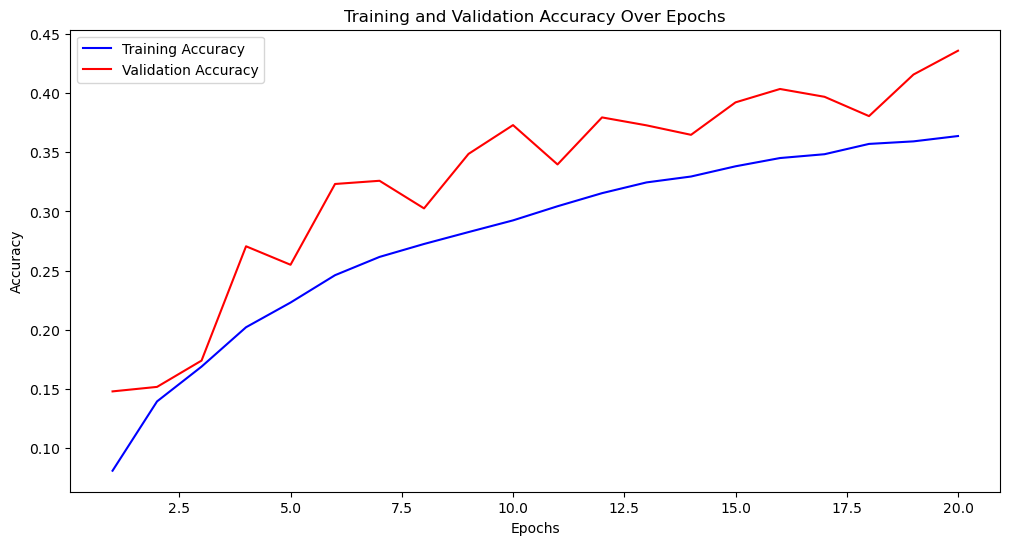

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Correct Example Probabilities: [2.01783521e-04 6.62737899e-03 4.02380712e-03 1.83934357e-03
 2.42937985e-03 1.58410110e-02 1.65541226e-03 3.55393277e-04
 5.71452896e-04 9.58985067e-04 1.80532578e-02 1.00894030e-02
 1.56565383e-02 4.08678986e-02 1.11932575e-03 6.20326167e-03
 1.90839951e-03 1.66947499e-03 1.01254145e-02 5.08028921e-03
 2.27178750e-03 4.33130655e-03 4.26093023e-03 1.12786761e-03
 8.34581879e-05 9.26608220e-03 3.29381507e-03 1.24730682e-02
 1.83874718e-03 8.71626474e-03 3.13337357e-03 1.77286752e-03
 4.69789142e-03 1.06960733e-03 2.52207159e-03 6.71272632e-03
 4.15699353e-04 3.25405970e-02 2.81378347e-03 1.84520811e-03
 1.05674632e-01 6.29073998e-04 3.45822977e-04 1.38908930e-04
 8.95555504e-03 3.69380158e-03 1.10321073e-02 8.45906688e-05
 7.84883450e-04 3.94961424e-03 6.27868751e-04 2.72570193e-01
 2.57132451e-05 4.23695201e-05 1.66124012e-02 1.23984832e-02
 3.80329113e-03 4.84511635e-04 4.12250236e-02 1.01524398e-04
 1.62344018e-

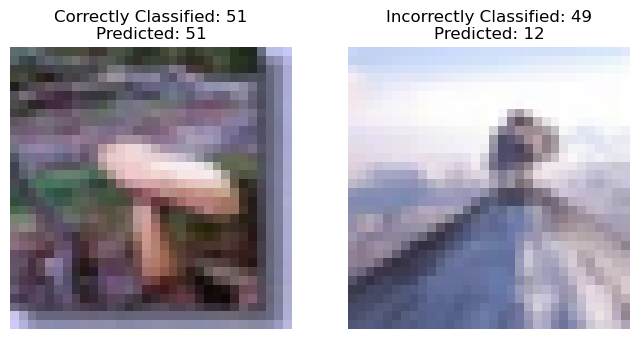

In [23]:
# Your code here
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Enhanced Model Accuracy on Test Set: {test_accuracy:.2%}")
print(f"Enhanced Model Loss on Test Set: {test_loss:.4f}")

# Plot Training and Validation Accuracy
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.plot(epochs, history.history['accuracy'], 'b-', label='Training Accuracy')

# Plot validation accuracy
plt.plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Accuracy')

plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualize a correctly and incorrectly classified image

# Predict probabilities on the test set
y_pred = model.predict(x_test)

# Convert predictions and ground truth to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Find correctly and incorrectly classified examples
correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

# Select one example from each
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

# Plot the correctly classified example
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correctly Classified: {y_true_classes[correct_idx]}\nPredicted: {y_pred_classes[correct_idx]}")
plt.axis('off')

# Display classification probabilities for correct example
print(f"Correct Example Probabilities: {y_pred[correct_idx]}")

# Plot the incorrectly classified example
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrectly Classified: {y_true_classes[incorrect_idx]}\nPredicted: {y_pred_classes[incorrect_idx]}")
plt.axis('off')

# Display classification probabilities for incorrect example
print(f"Incorrect Example Probabilities: {y_pred[incorrect_idx]}")

plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

- The enhanced model demonstrated improved performance compared to the baseline. The test accuracy increased from 34.54% to around 43.20%. This improvement is attributed to the implementation of data augmentation, which enriched the training dataset by introducing variations, and dropout, which reduced overfitting by forcing the model to generalize better.

- Despite the improvement, there is still significant room for further enhancement. The CIFAR-100 dataset is challenging due to its 100 classes and small image dimensions (32x32). Techniques like transfer learning with a pre-trained model (e.g., ResNet or EfficientNet) could leverage the rich features learned from larger datasets. Additionally, employing learning rate scheduling or early stopping could fine-tune the training process for optimal performance.

- Other techniques to explore include increasing model depth with residual connections, fine-grained hyperparameter tuning, or incorporating ensemble learning to combine predictions from multiple models. These approaches could further enhance accuracy and robustness.

- While the current improvements are promising, achieving high accuracy on CIFAR-100 will require careful experimentation and more advanced techniques, suggesting significant potential for further growth.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.